In [ ]:
%pip install wordcloud nltk seaborn matplotlib networkx scikit-learn


# Data Processing in Python and R

## Assignment 4 - Mateusz Nedzi


### Table of contents

- 0. Data loading

- 1. Task 1

    - 1.1 What is the most commonly used category in papers in ArXiv? Prepare visualization of the distribution of categories (e.g. prepare barplot presenting the number of occurrences of each category)
    - 1.2 For one category of your choice, prepare a word cloud based on the available abstracts.

- 2. Task 2



---



## 0. Data loading

In [3]:
import pandas as pd
import json

# Initialize an empty list to store the data
data = []

# Read the JSONL file line by line
with open('arxiv-metadata.jsonl', 'r') as file:
    for line in file:
        # Parse each line as JSON and append to the list
        data.append(json.loads(line))

# Convert the list of dictionaries to a pandas DataFrame
df = pd.DataFrame(data)


In [4]:
df.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0704.0001,Pavel Nadolsky,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",Calculation of prompt diphoton production cros...,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",10.1103/PhysRevD.76.013009,ANL-HEP-PR-07-12,hep-ph,None,A fully differential calculation in perturba...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2008-11-26,"[[Balázs, C., ], [Berger, E. L., ], [Nadolsky,..."
1,0704.0002,Louis Theran,Ileana Streinu and Louis Theran,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,None,None,None,math.CO cs.CG,http://arxiv.org/licenses/nonexclusive-distrib...,"We describe a new algorithm, the $(k,\ell)$-...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2008-12-13,"[[Streinu, Ileana, ], [Theran, Louis, ]]"
2,0704.0003,Hongjun Pan,Hongjun Pan,The evolution of the Earth-Moon system based o...,"23 pages, 3 figures",None,None,None,physics.gen-ph,None,The evolution of Earth-Moon system is descri...,"[{'version': 'v1', 'created': 'Sun, 1 Apr 2007...",2008-01-13,"[[Pan, Hongjun, ]]"
3,0704.0004,David Callan,David Callan,A determinant of Stirling cycle numbers counts...,11 pages,None,None,None,math.CO,None,We show that a determinant of Stirling cycle...,"[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2007-05-23,"[[Callan, David, ]]"
4,0704.0005,Alberto Torchinsky,Wael Abu-Shammala and Alberto Torchinsky,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,None,"Illinois J. Math. 52 (2008) no.2, 681-689",None,None,math.CA math.FA,None,In this paper we show how to compute the $\L...,"[{'version': 'v1', 'created': 'Mon, 2 Apr 2007...",2013-10-15,"[[Abu-Shammala, Wael, ], [Torchinsky, Alberto, ]]"


## 1. Task 1

### 1.1. What is the most commonly used category in papers in ArXiv? Prepare visualization of the distribution of categories (e.g. prepare barplot presenting the number of occurrences of each category)

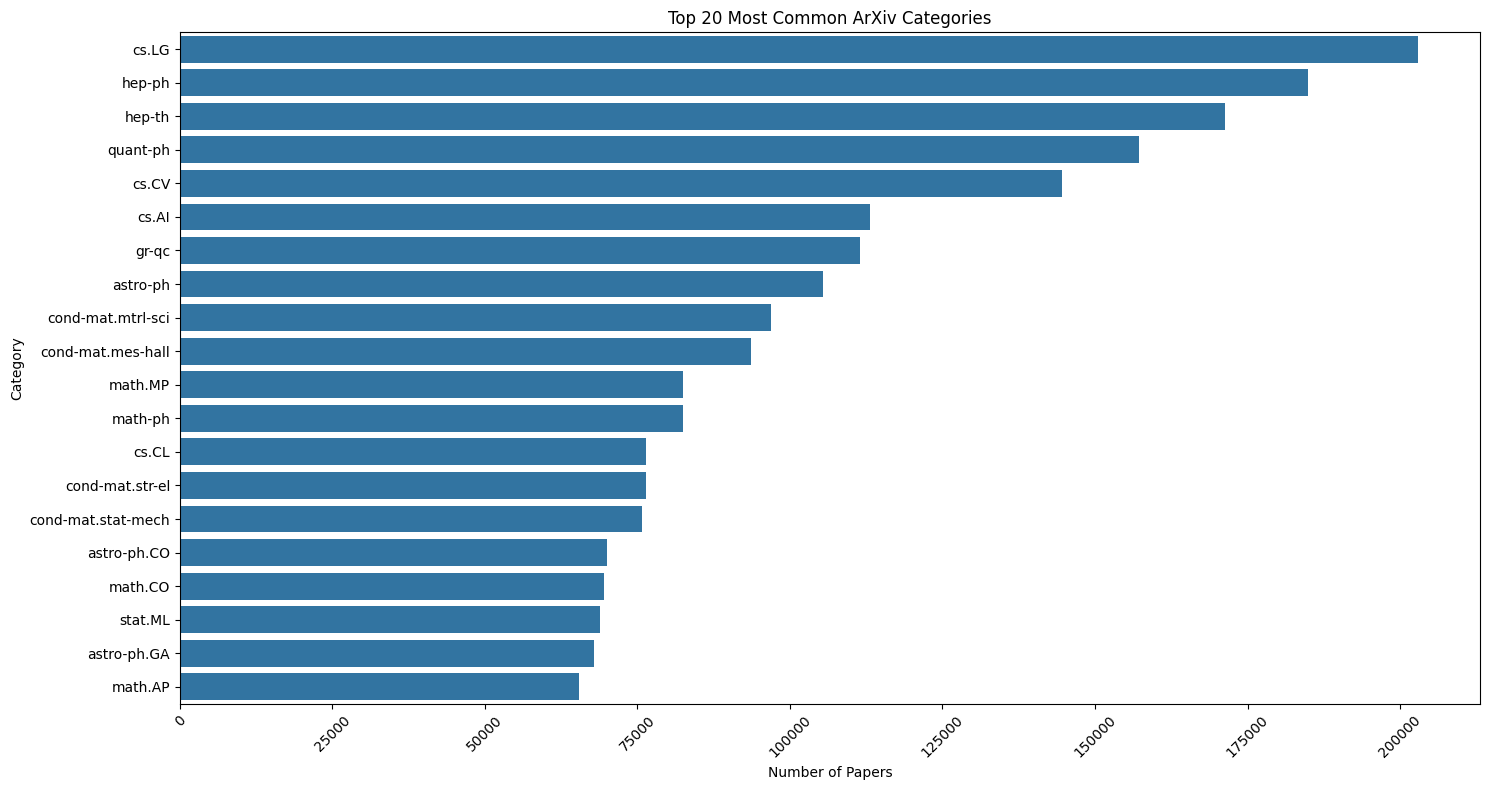

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category
all_categories = df['categories'].str.split().explode()
category_counts = all_categories.value_counts()

plt.figure(figsize=(15, 8))
sns.barplot(x=category_counts.head(20).values, y=category_counts.head(20).index)

plt.title('Top 20 Most Common ArXiv Categories')
plt.xlabel('Number of Papers')
plt.ylabel('Category')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.2. For one category of your choice, prepare a word cloud based on the available abstracts.



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matined/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


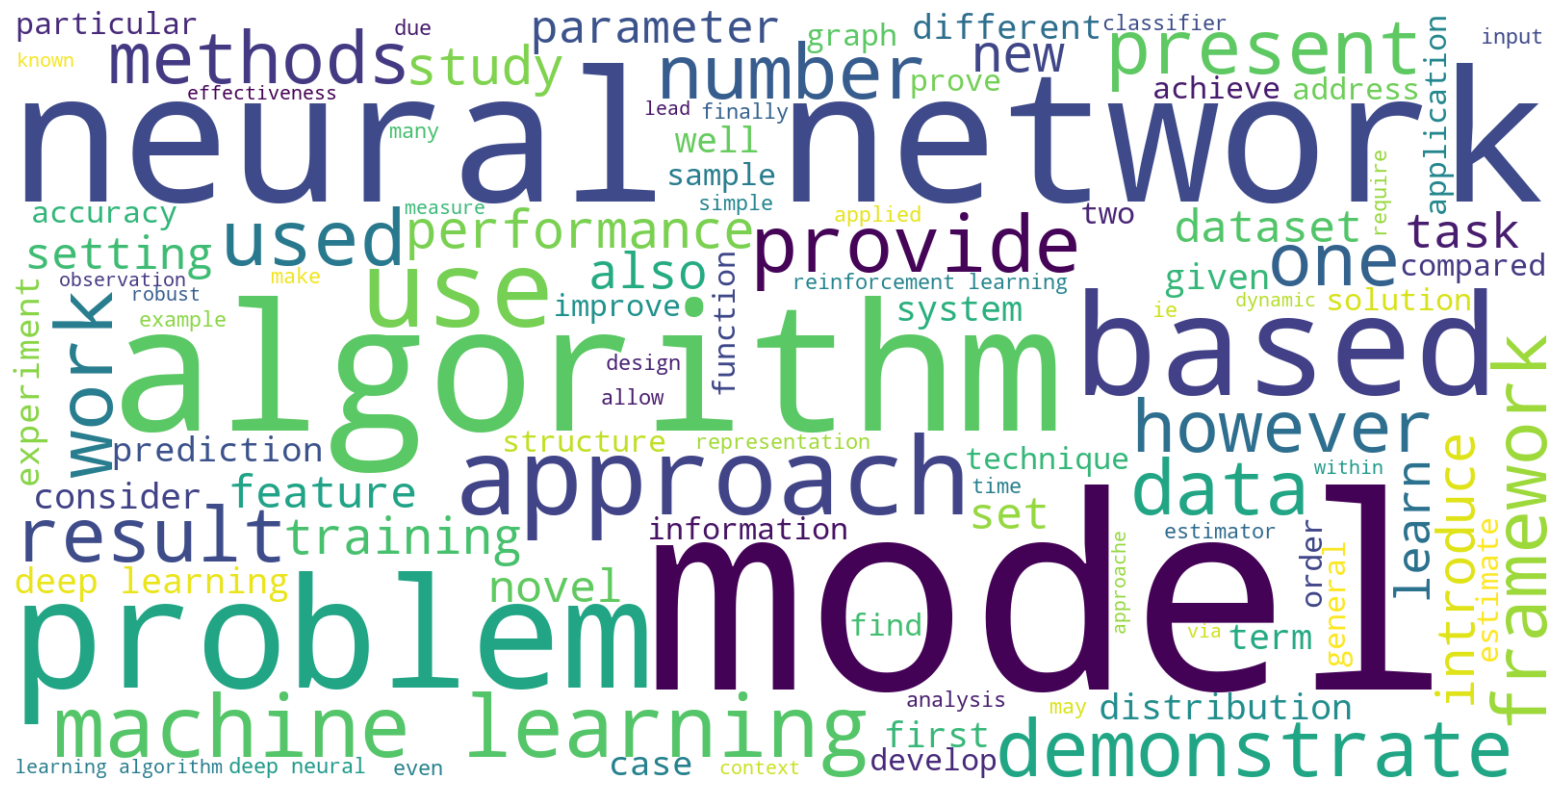

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

nltk.download('stopwords')

# Filter papers for stat.ML category
stat_ml_papers = df[df['categories'].str.contains('stat.ML', na=False)]

# Combine all abstracts
all_abstracts = ' '.join(stat_ml_papers['abstract'].astype(str))

# Clean the text, remove special characters and numbers
clean_text = re.sub(r'[^a-zA-Z\s]', '', all_abstracts)
clean_text = clean_text.lower()

# Get stopwords and add any additional domain-specific words you want to exclude
stop_words = set(stopwords.words('english'))
stop_words.update(['arxiv', 'paper', 'propose', 'proposed', 'method', 'using', 'show'])

# Generate a word cloud image
wordcloud = WordCloud(
    width=1600, 
    height=800,
    background_color='white',
    stopwords=stop_words,
    max_words=100,
    min_font_size=10
).generate(clean_text)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 1.3. For 5 top most commonly used categories find top 3 words used in abastracts

In [16]:
from collections import Counter
import nltk

nltk.download('stopwords')

top_5_categories = all_categories.value_counts().head(5).index

def get_top_words(text, n=3):
    clean_text = re.sub(r'[^a-zA-Z\s]', '', text)
    clean_text = clean_text.lower()
    
    words = clean_text.split()
    
    stop_words = set(stopwords.words('english'))
    stop_words.update(['arxiv', 'paper', 'propose', 'proposed', 'method', 'using', 'show', 'we'])
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    word_counts = Counter(words)
    return word_counts.most_common(n)


category_top_words = {}

for category in top_5_categories:
    category_papers = df[df['categories'].str.contains(category, na=False)]
    
    all_abstracts = ' '.join(category_papers['abstract'].astype(str))

    top_words = get_top_words(all_abstracts)
    
    category_top_words[category] = top_words

for category, words in category_top_words.items():
    print(f"Category: {category}")
    for word, count in words:
        print(f"  - {word}: {count} occurrences")
    print()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/matined/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Category: cs.LG
  - learning: 236313 occurrences
  - data: 217798 occurrences
  - model: 182082 occurrences

Category: hep-ph
  - model: 119349 occurrences
  - mass: 83286 occurrences
  - matter: 59901 occurrences

Category: hep-th
  - theory: 123466 occurrences
  - field: 99184 occurrences
  - model: 74187 occurrences

Category: quant-ph
  - quantum: 345817 occurrences
  - states: 92428 occurrences
  - state: 82467 occurrences

Category: cs.CV
  - image: 128898 occurrences
  - model: 121100 occurrences
  - data: 111852 occurrences



## 2. Task 2


Processed papers: 2651646
Valid collaborations found: 704660356

Filtered graph statistics:
Number of nodes (authors): 100
Number of edges (collaborations): 4557


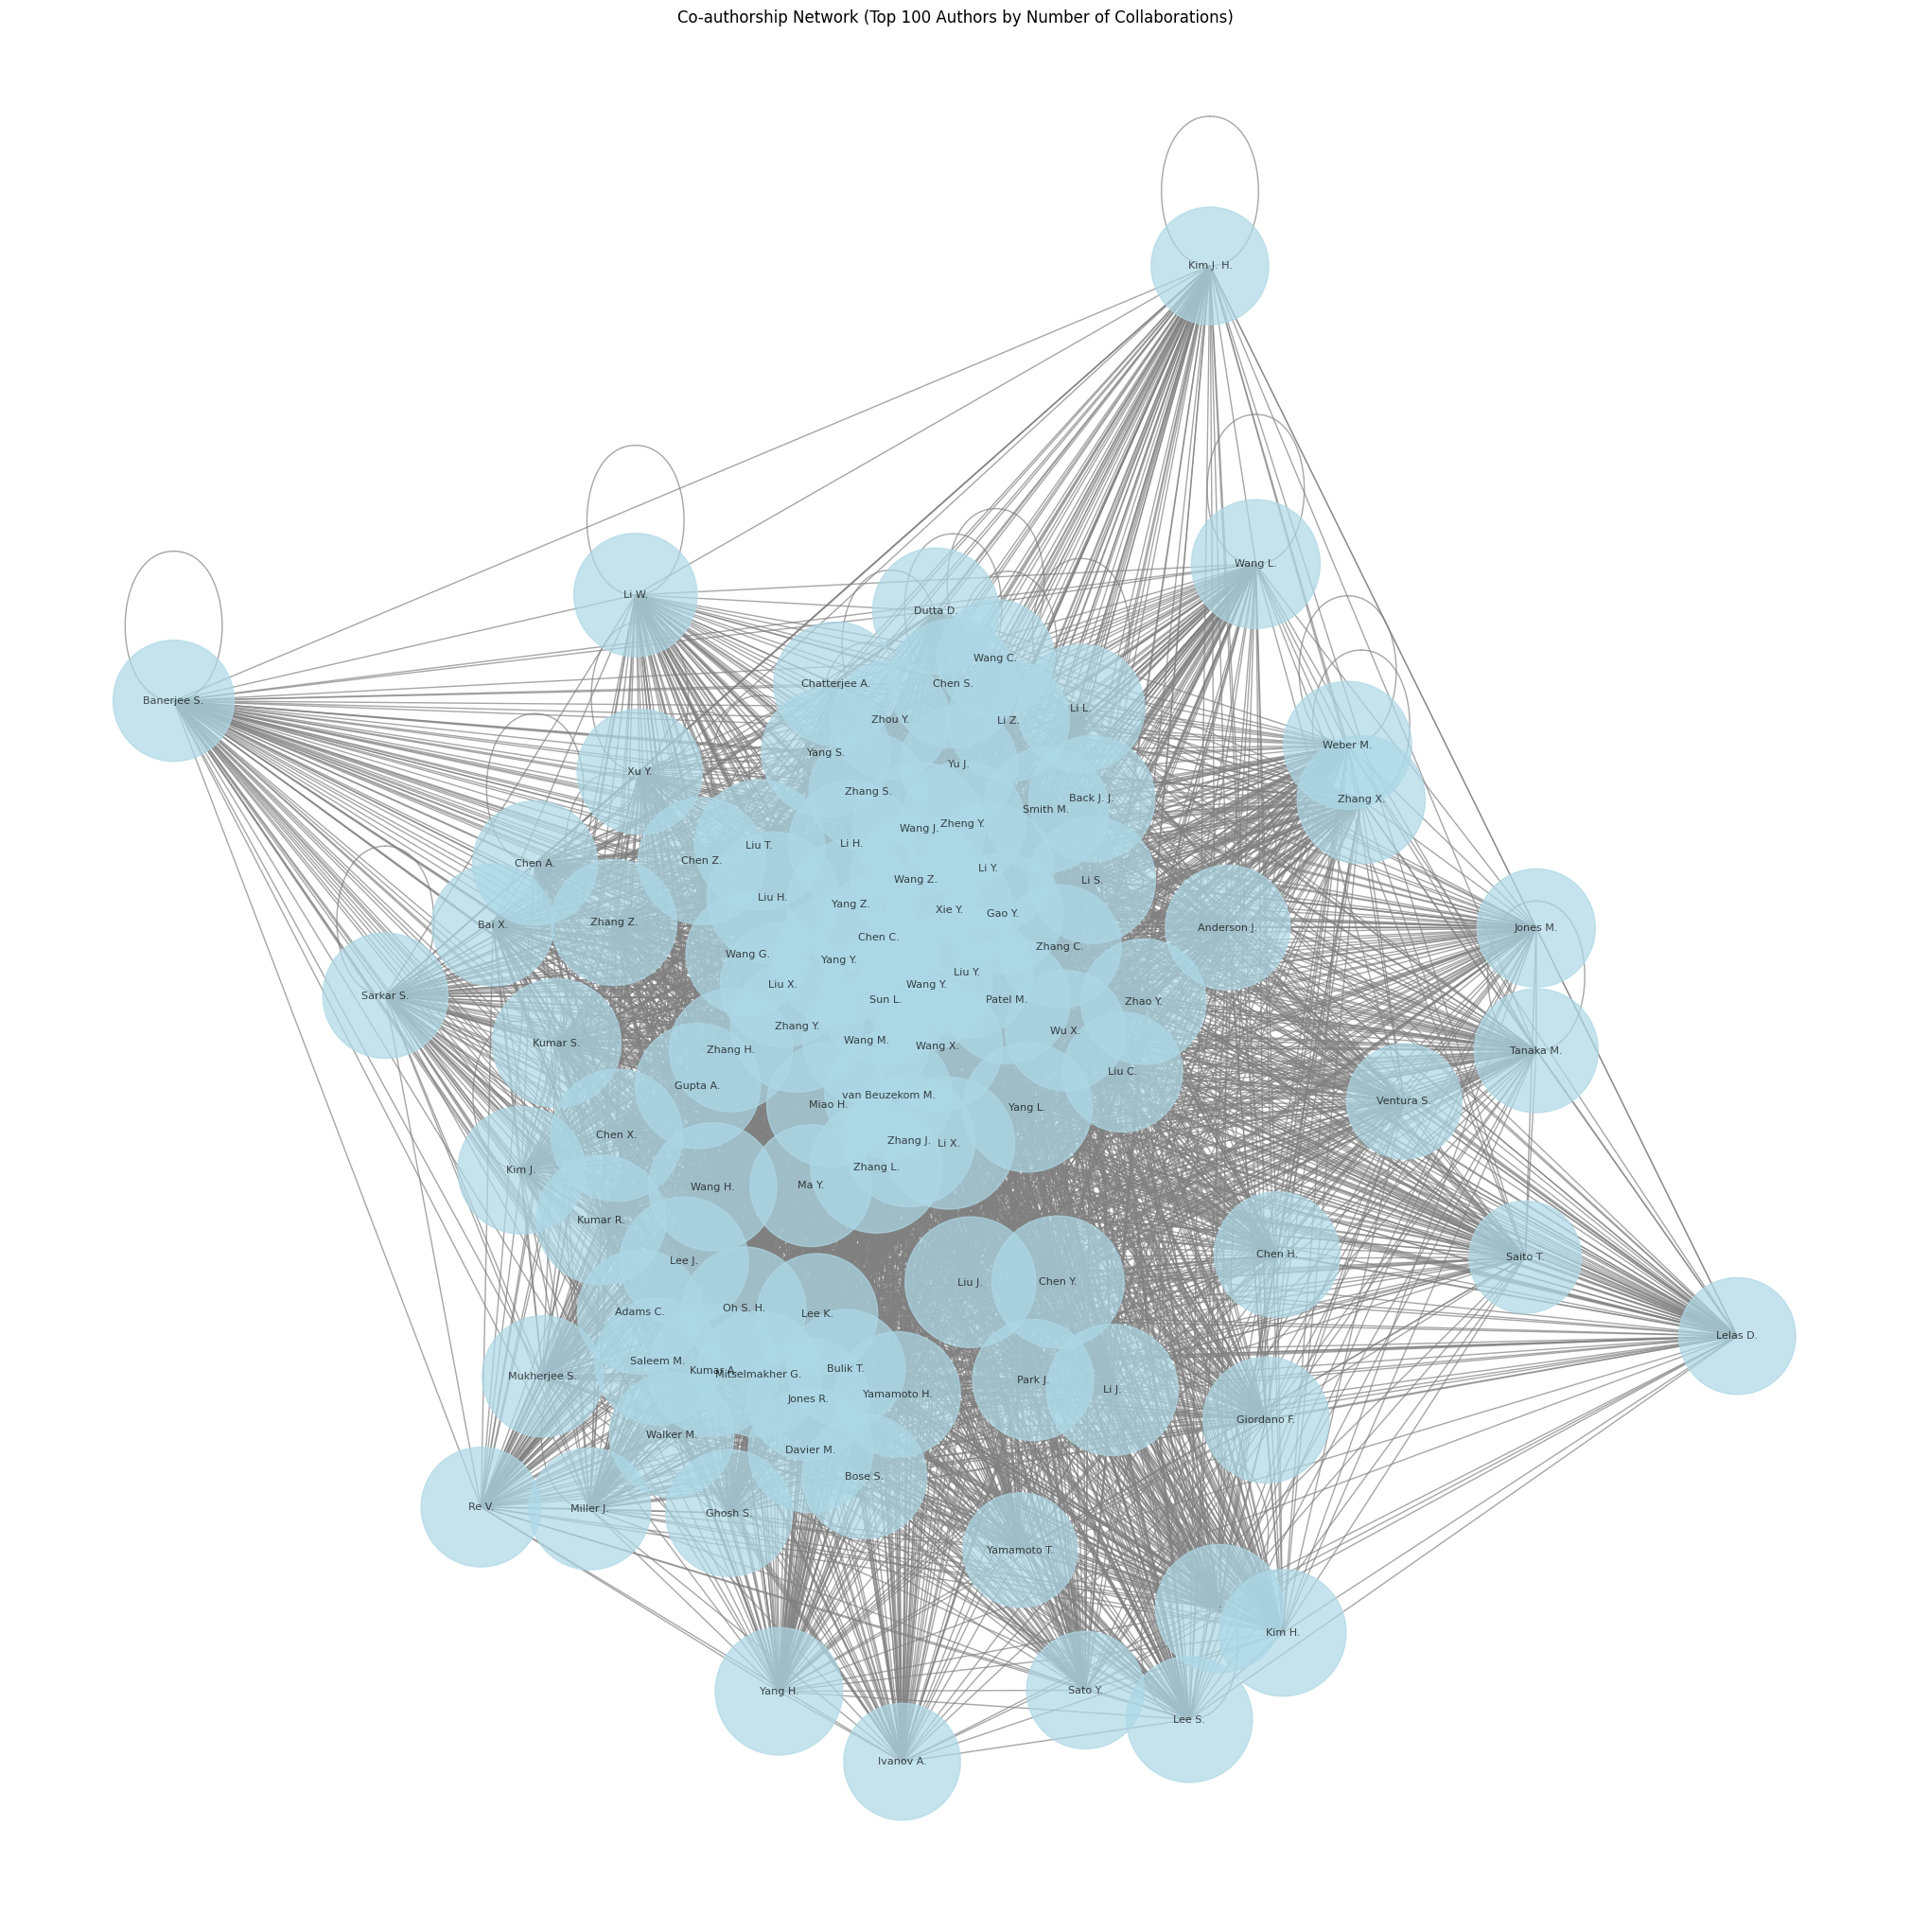

In [24]:
import networkx as nx
from collections import defaultdict
import ast

G = nx.Graph()
coauthors = defaultdict(int)

def clean_author_name(author):
    try:
        lastname = str(author[0]).strip()
        firstname = str(author[1]).strip()
        return f"{lastname} {firstname}".strip()
    except (IndexError, TypeError):
        return None

processed_papers = 0
valid_collaborations = 0

for idx, authors_list in df['authors_parsed'].items():
    try:
        if isinstance(authors_list, list):
            authors = authors_list
        else:
            authors = ast.literal_eval(str(authors_list))

        author_names = [clean_author_name(author) for author in authors]
        author_names = [name for name in author_names if name]
        
        for i in range(len(author_names)):
            for j in range(i + 1, len(author_names)):
                coauthors[(author_names[i], author_names[j])] += 1
                valid_collaborations += 1
        
        processed_papers += 1
        
    except Exception as e:
        continue

print(f"\nProcessed papers: {processed_papers}")
print(f"Valid collaborations found: {valid_collaborations}")

if coauthors:
    for (author1, author2), weight in coauthors.items():
        G.add_edge(author1, author2, weight=weight)
    
    degree_dict = dict(G.degree())
    
    top_authors = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True)[:100]
    top_author_names = set(author for author, _ in top_authors)
    
    G_filtered = G.subgraph(top_author_names)
    
    print(f"\nFiltered graph statistics:")
    print(f"Number of nodes (authors): {G_filtered.number_of_nodes()}")
    print(f"Number of edges (collaborations): {G_filtered.number_of_edges()}")
    
    degree_dict_filtered = dict(G_filtered.degree())
    node_sizes = [v * 100 for v in degree_dict_filtered.values()]
    
    plt.figure(figsize=(20, 20))
    
    pos = nx.spring_layout(G_filtered, k=1.5, iterations=50)
    nx.draw(G_filtered, 
            pos,
            node_size=node_sizes,
            node_color='lightblue',
            edge_color='gray',
            alpha=0.7,
            with_labels=True,
            font_size=8)
    
    plt.title("Co-authorship Network (Top 100 Authors by Number of Collaborations)")
    plt.show()
